In [1]:
import pandas as pd
import numpy as np
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("datasets/loan_data.csv")

dataset.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

for column in dataset.columns:
    if dataset[column].dtype == "object":
        dataset[column] = LabelEncoder().fit_transform(dataset[column])

X,y = dataset.drop(columns=["loan_status"]), dataset["loan_status"]

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train, X_test = pd.DataFrame(X_train, columns=X.columns), pd.DataFrame(X_test, columns=X.columns)
y_train, y_test = pd.Series(y_train, name="targets"), pd.Series(y_test, name="targets")

In [4]:

models = [
    ["max_depth",[1,2,4,8,16,32], DecisionTreeClassifier],
    ["n_estimators",[1,2,4,8,16,32], RandomForestClassifier],
    ["n_estimators",[1,2,4,8,16,32], GradientBoostingClassifier],
    ["n_estimators",[1,2,4,8,16,32], AdaBoostClassifier],
]

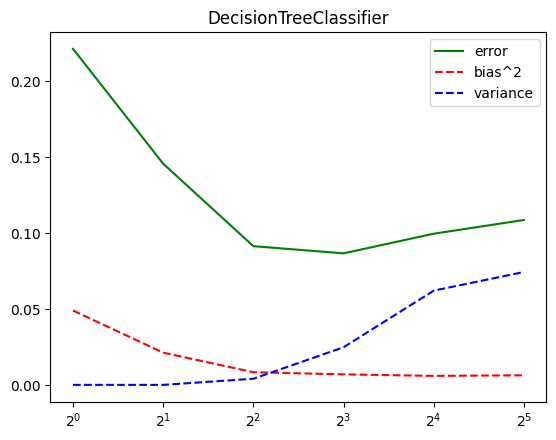

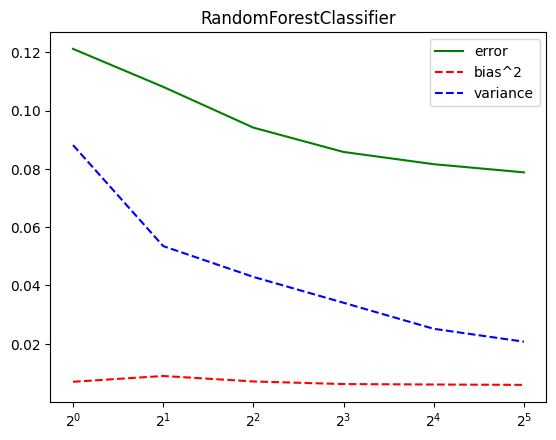

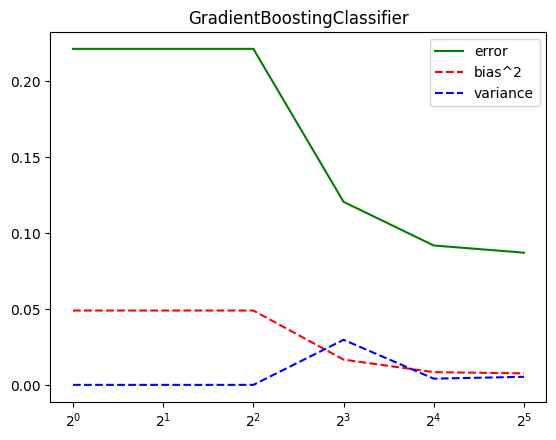

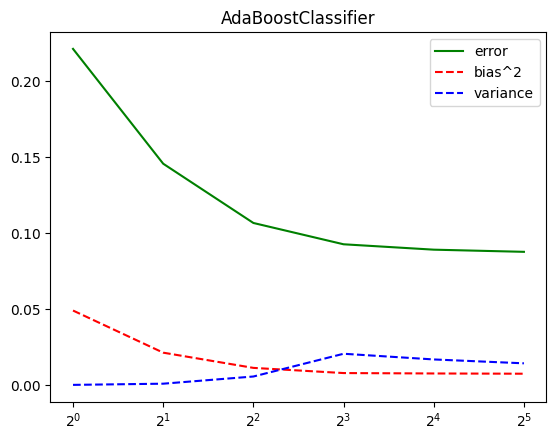

In [8]:
import matplotlib.pyplot as plt

for parameter, values, class_name in models:
    X = []
    y_error = []
    y_bias_2 = []
    y_var = []
    for value in values:
        model = class_name(**{parameter:value})
        loss, bias, var = bias_variance_decomp(model, X_train=X_train.values, X_test=X_test.values, y_train=y_train.values, y_test=y_test.values, num_rounds=10)
        X.append([value])
        y_error.append(loss) # 0-1 loss
        y_bias_2.append(bias**2)
        y_var.append(var)
    plt.plot(X, y_error, label="error", color="green")
    plt.plot(X, y_bias_2, label="bias^2", linestyle="dashed", color="red")
    plt.plot(X, y_var, label="variance", linestyle="dashed", color="blue")
    plt.legend()
    plt.xscale("log", base=2)
    plt.title(class_name.__name__)
    plt.show()

<h3>Decision Tree:</h2>
<p>
    As we see for decision tree as max depth increases bias decreases but variance increases.
    So use decision tree when you want to decrease bias
</p>
<h3>Random Forests:</h2>
<p>
    As we see for random forests as number of components increase the variance decreases and we don't see significant difference in bias as it starts with
    low bias. Use when you need to lower variance
</p>
<h3>GradientBoosting and AdaBoost:</h2>
<p>
    We can see a clear decreasing trend of bias as number of components decrease. Use when you need to lower bias.
</p>